In [ ]:
!pip install kaggle
!kaggle competitions download -c dog-breed-identification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!unzip dataset.zip -d data

Archive:  dataset.zip
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (147).jpg  
  inflating: data/skin-disease-datasaet/test_set/BA- cellulitis/BA- c

In [ ]:
import os
import os.path as op
import shutil
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
dataset_folder = "data/skin-disease-datasaet"

In [ ]:
image_path = []

In [ ]:
for filename in os.listdir(dataset_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        current_image_path = op.join(dataset_folder, filename)
        image_path.append(current_image_path)
        print(current_image_path)
labels = [op.basename(op.dirname(path)) for path in image_path]
train_df = pd.DataFrame({'image_path': image_path, 'label': labels})

In [ ]:
root_dir = "data/train_breed"
for _, r in train_df.iterrows():
    if not op.exists(f"{root_dir}/{r.breed}"):
        os.makedirs(f"{root_dir}/{r.breed}")
    shutil.copy(r.path, f"{root_dir}/{r.breed}/{r.id}.jpg")

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
fields = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os.path as op

In [ ]:
def print_and_get_images(folder_path):
  image_paths = []  # List to store image paths
  for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Construct full image path
            current_image_path = op.join(folder_path, filename)

            # Print image path
            print(current_image_path)

            # Add image path to the list
            image_paths.append(current_image_path)

            # Read and display image using OpenCV and Matplotlib
            image = cv2.imread(current_image_path)

            # Convert color space from BGR (OpenCV default) to RGB (Matplotlib default)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.imshow(image_rgb)
            plt.title(filename)  # Set title to filename
            plt.axis('off')  # Hide axes
            plt.show()

  return image_paths  # Return list of image paths

In [ ]:
dataset_folder = "data/skin-disease-datasaet"  # Replace with your folder path
image_paths = print_and_get_images(dataset_folder)

In [ ]:
parent_label("data/test/000621fb3cbb32d8935728e48679680e.jpg")

'test'

In [ ]:
from fastai.vision.all import *

In [ ]:
dls = ImageDataLoaders.from_path_func(
    dataset_folder,
    get_image_files(dataset_folder),
    valid_pct=0.2,
    seed=42,
    label_func=parent_label,
    item_tfms=Resize(224)
)

In [ ]:
dls.vocab

['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']

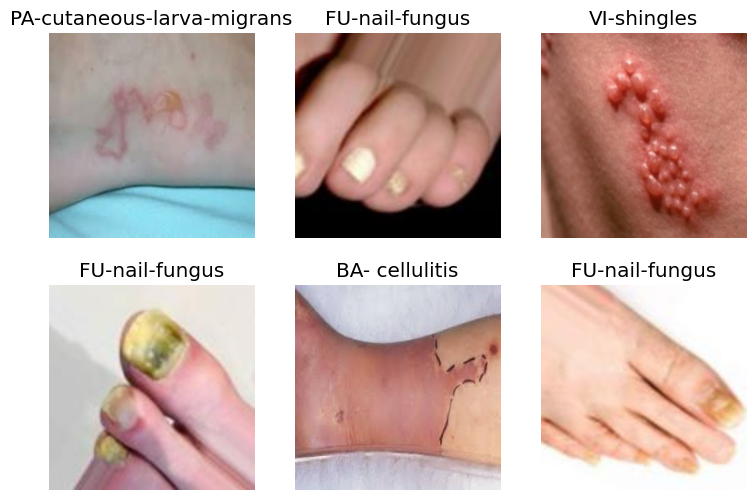

In [ ]:
dls.train.show_batch(max_n=6, nrows=2)

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.6MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.001737800776027143)

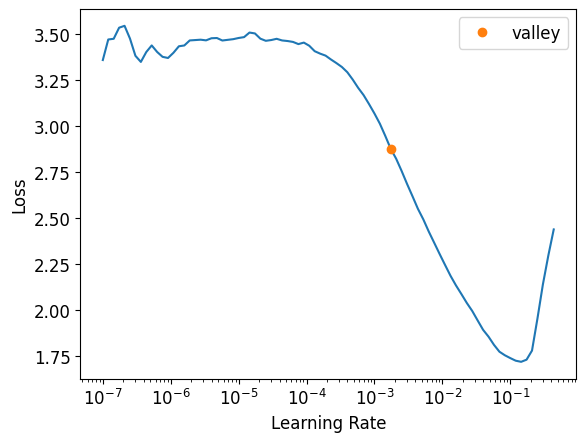

In [ ]:
learner.lr_find()

In [ ]:
learner.fine_tune(epochs=6, freeze_epochs=1, base_lr=0.0012)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.021383,0.105488,0.034632,0.965368,06:29


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.013384,0.074810,0.030303,0.969697,09:31
1,0.012744,0.089857,0.030303,0.969697,09:18
2,0.014452,0.074466,0.025974,0.974026,09:24
3,0.012291,0.045800,0.021645,0.978355,09:24
4,0.009769,0.041755,0.017316,0.982684,09:12
5,0.008481,0.039097,0.017316,0.982684,09:18


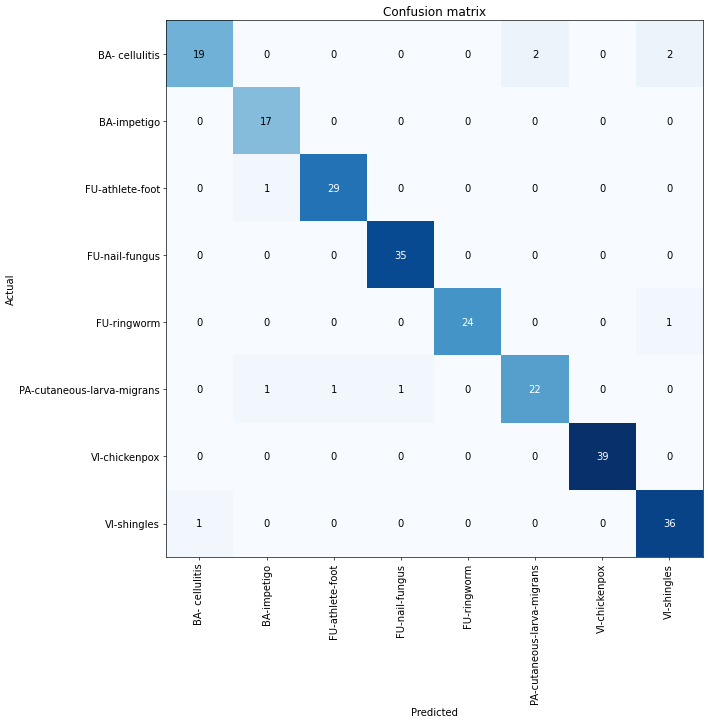

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learner.export("Skin_disease.pkl")

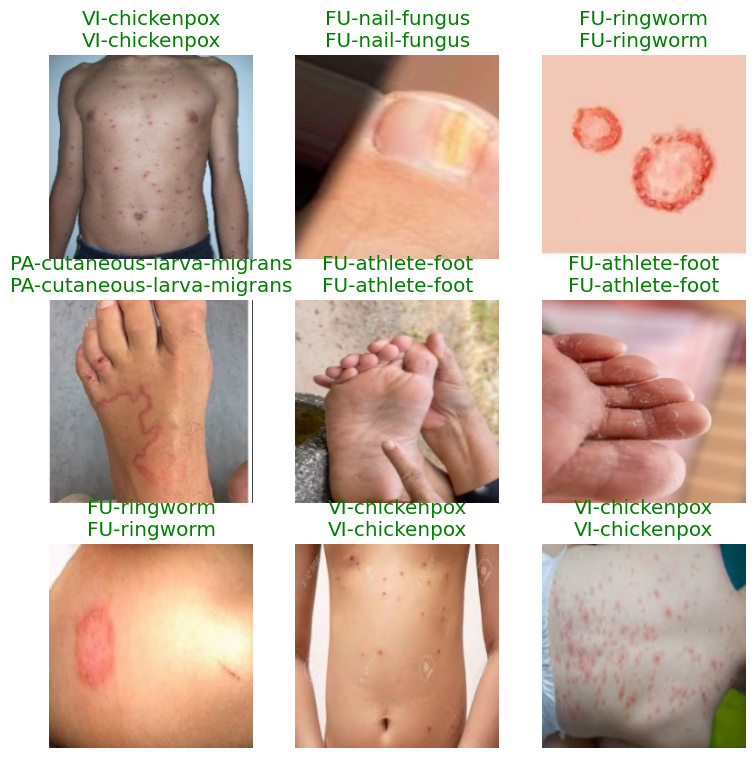

In [ ]:
learner.show_results(shuffle=True)

In [ ]:
from fastbook import *
from glob import glob
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score

learn_inf = load_learner('Skin_disease.pkl')